In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve

In [ ]:
image_directory = "/content/drive/MyDrive/data2/"

In [ ]:
SIZE = 55
dataset = []
label = []

normal_images = os.listdir(image_directory + 'normal/')
for i, image_name in enumerate(normal_images) :
  if (image_name.split('.')[1] == 'jpg') :
    image= cv2.imread(image_directory + 'normal/' +image_name)
    image = Image.fromarray(image,'RGB')
    image = image.convert("L")
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)

gli_images = os.listdir(image_directory + 'glioma_tumor/')
for i, image_name in enumerate(gli_images) :
  if (image_name.split('.')[1] == 'jpg') :
    image= cv2.imread(image_directory + 'glioma_tumor/' +image_name)
    image = Image.fromarray(image,'RGB')
    image = image.convert("L")
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

men_images = os.listdir(image_directory + 'meningioma_tumor/') # le dossier qui contient images Uninfected
for i, image_name in enumerate(men_images) :
  if (image_name.split('.')[1] == 'jpg') :
    image= cv2.imread(image_directory + 'meningioma_tumor/' +image_name)
    image = Image.fromarray(image,'RGB')
    image = image.convert("L")
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(2)

pitu_images = os.listdir(image_directory + 'pituitary_tumor/') # le dossier qui contient images Uninfected
for i, image_name in enumerate(pitu_images) :
  if (image_name.split('.')[1] == 'jpg') :
    image= cv2.imread(image_directory + 'pituitary_tumor/' +image_name)
    image = Image.fromarray(image,'RGB')
    image = image.convert("L")
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(3)

In [ ]:
dataset = np.array(dataset) # array to numpy array
label = np.array(label)
dataset.shape

(600, 55, 55)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size =0.20, random_state =21)

In [ ]:
from keras.utils import normalize
X_train = normalize(X_train, axis =1) # on normalise, pour éviter les differance d'amplitude
X_test = normalize(X_test, axis =1)

In [ ]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (55,55,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 51, 51, 6)         156       
                                                                 
 average_pooling2d_31 (Aver  (None, 25, 25, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_32 (Conv2D)          (None, 21, 21, 16)        2416      
                                                                 
 average_pooling2d_32 (Aver  (None, 10, 10, 16)        0         
 agePooling2D)                                                   
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_45 (Dense)            (None, 120)             

In [ ]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = CNN.fit(X_train,
                 y_train,
                 batch_size = 500,
                 epochs = 250,
                 verbose = 3,
                 validation_data = (X_test, y_test))

Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/250
Epoch 75/250
Epoch 76/250
Epoch 77/250
Epoch 78

In [ ]:
score = CNN.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

4/4 [==============================] - 0s 30ms/step - loss: 0.9967 - accuracy: 0.7417
Test Accuracy: 0.7416666746139526


In [ ]:
y_pred = CNN.predict(X_test)
y_predicted = np.argmax(y_pred, axis=1)

4/4 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_predicted)

0.7416666666666667

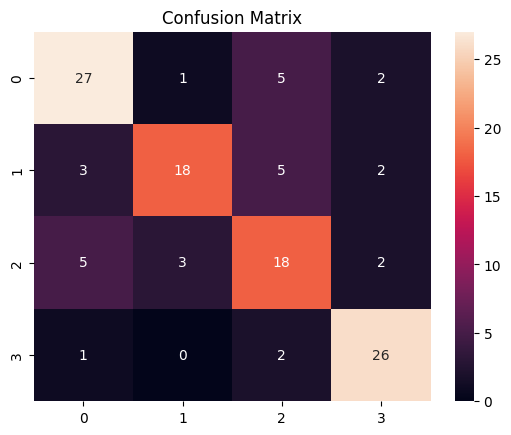

In [ ]:
cm = confusion_matrix(y_test, y_predicted)

sns.heatmap(cm, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
CNN.save("bt_model_55.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model("/content/bt_model_55.h5")

In [ ]:
score = loaded_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

4/4 [==============================] - 0s 5ms/step - loss: 0.9967 - accuracy: 0.7417
Test Accuracy: 0.7416666746139526


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

In [ ]:
with open("bt_55_model.tflite", "wb") as f:
    f.write(tflite_model)